# PyTorch 基础

<br>

## 0. 概述

<br>

<font color=black size=3 face=雅黑>　　在开始深度学习项目之前，选择一个合适的框架是非常重要的。常见的深度学习框架包括 TensorFlow, Keras, PyTorch, Caffe, Theano, CNTK, PaddlePaddle 等。本次实验我们将选用 PyTorch，并学习 PyTorch 的背景知识和一些基本使用方法。最后，我们将基于 PyTorch 搭建一个卷积神经网络 (Convolutional Neural Network, CNN)，并在数据集上进行测试。
    
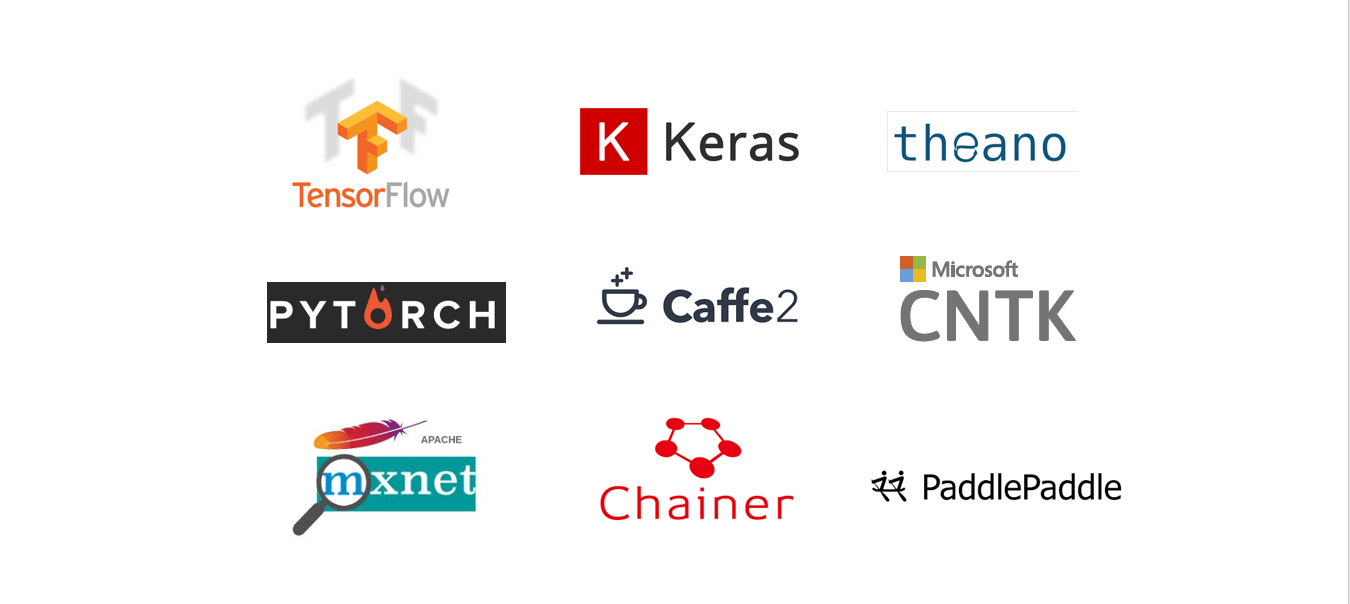
 
<br>
    
    
<font color=black size=3 face=雅黑>　　在介绍 PyTorch 之前，不得不先介绍 Torch。Torch 是一个有大量机器学习算法支撑的科学计算框架，是一个与 Numpy 类似的张量（Tensor） 操作库，其诞生已经有十年之久，但是真正起势得益于 Facebook 开源了大量 Torch 的深度学习模块和扩展。Torch 的特点在于特别灵活。但因其采用了小众的编程语言 Lua，在目前深度学习大部分都采用以 Python 为编程语言的大环境下，流行度不高，这也就有了 PyTorch 的出现。PyTorch 使用 Python 作为开发语言，其前身就是 Torch，底层和 Torch 框架一样，但是使用 Python 重写了很多内容。
    
<font color=black size=3 face=雅黑>　　PyTorch 是一个基于 Torch 的 Python 开源机器学习库，可用于计算机视觉、自然语言处理等任务。它主要由 Facebook 的人工智能小组开发，不仅能够实现强大的 GPU 加速，同时还支持动态神经网络，这一点是现在很多主流框架如 TensorFlow 都不支持的。同学们如果有兴趣也可以在课后了解一下 Google 公司开发的 TensorFlow，并和 PyTorch 对比，在未来进行相关研究或应用时，可以选择自己喜欢的深度学习框架。
    
<font color=black size=3 face=雅黑>　　与上次实验课利用 Numpy 手动搭建神经网络相比，PyTorch 为我们提供了如下几个高级功能：1.它具有强大的 GPU 支持的张量计算功能，能够高效实现神经网络中的各种张量运算；2.它能够自动实现反向传播过程中的求导运算，大大降低用户的工作量；3.我们常用的神经网络组成模块如卷积层 (convolutional layer)、池化层 (pooling layer)、全连接层 (fully-connected layer)、各种激活函数 (activation functions) 等 PyTorch 都支持，对用户来讲使用非常方便。目前除了 Facebook 之外，Twitter 和 GMU 等许多机构都采用了 PyTorch。

<font color=black size=3 face=雅黑>　　下面，我们就来学习 PyTorch 的基本用法。
    
<br>    
    
<font color=black size=２ face=雅黑>Ref:  
    
<font color=black size=２ face=雅黑>　　PyTorch官方教程　https://pytorch.org/tutorials/beginner/basics/intro.html
    
<font color=black size=２ face=雅黑>　　http://deeplizard.com/learn/playlist/PLZbbT5o_s2xrfNyHZsM6ufI0iZENK9xgG


<br>


## 1. 导入 PyTorch

In [1]:
import torch
import torchvision
import numpy as np

<font color=black size=3 face=雅黑>查看 PyTorch 版本，是否可以使用GPU，以及 CUDA 的版本。

In [2]:
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.version.cuda)

1.5.0
True
10.2


## 2. 张量（Tensor）

<br>

<font color=black size=3 face=雅黑>　　PyTorch 中的张量 (tensor) 与数组和矩阵类似，是一种特殊的数据结构。在 PyTorch 中，我们使用 tensor 来表示模型的输入、输出以及模型的参数等。PyTorch 中的 tensor 类似于 Numpy 中的数组类型（ndarrays），不同的是 tensor 运算可以在 GPU 或其他硬件加速器上高效快速的运行，而 Numpy 数组只能在 CPU 上运行。实际上，tensor 和 Numpy 数组通常可以共享相同的底层内存，从而消除类型转换时复制数据的需求。与此同时，tensor 也支持自动求导功能 (我们将在后面详细介绍)。如果你熟悉 Numpy 数组，那也将会对 tensor API 感到非常熟悉。 
    
<br> 
    
<font color=black size=3 face=雅黑>　　下图展示了一维张量到六维张量。其中零维张量也称为标量，一维张量称为向量，二维张量就是我们一般说的矩阵。
    
<code>
%%html
<img src = "https://img2.baidu.com/it/u=2361272870,3380923272&fm=26&fmt=auto", width=65%>

### 2.1 张量初始化 (Tensor Initialization)
<br>

<font color=black size=3 face=雅黑>1) 初始化一个空张量

In [3]:
# create an empty tensor by calling the constructor of torch.Tensor class
t = torch.Tensor()
t

tensor([])

<font color=black size=3 face=雅黑>2) 由数据直接创建

In [4]:
# tensors can be created directly from data. The data type is automatically inferred.
data = [1, 2, 3, 4]

t1 = torch.Tensor(data)  # constuctor create the object with the default data type (float32)
print(t1)
print(t1.dtype)  # print the data type

tensor([1., 2., 3., 4.])
torch.float32


In [5]:
t2 = torch.tensor(data)  # the datatype will be int64
print(t2)
print(t2.dtype)

tensor([1, 2, 3, 4])
torch.int64


<font color=black size=3 face=雅黑>3) 由 Numpy 数组创建 (反之亦可)

In [6]:
# tensors can be created from Numpy arrays (and vice versa)
np_arr = np.array([1,2,3,4])
t = torch.from_numpy(np_arr)  # they share the same memory
print(t)
print(t.dtype)

tensor([1, 2, 3, 4])
torch.int64


<font color=black size=3 face=雅黑>　由 Numpy 数组创建的 tensor 与原数组共享存储空间，因此原数组一经变化，tensor 也会发生相应的改变

In [7]:
np_arr[0] = 999
t

tensor([999,   2,   3,   4])

<font color=black size=3 face=雅黑>4) 由另一个 Pytorch tensor 创建

In [8]:
# the new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden
t_ones = torch.ones_like(t2) # retains the properties of t_data
print(f"Ones Tensor: \n {t_ones} \n")

t_rand = torch.rand_like(t2, dtype=torch.float) # overrides the datatype of t_data
print(f"Random Tensor: \n {t_rand} \n")

Ones Tensor: 
 tensor([1, 1, 1, 1]) 

Random Tensor: 
 tensor([0.8690, 0.0838, 0.6201, 0.4123]) 



<font color=black size=3 face=雅黑>5) 其他方式创建

In [9]:
# create tensors with random or constant values
shape = (2,3,)
rand_tensor = torch.rand(shape)  # 构建一个随机初始化的张量
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.5247, 0.3983, 0.7884],
        [0.3835, 0.8066, 0.1379]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### 2.2 张量的属性 (Attributes)
<br>

<font color=black size=3 face=雅黑>张量的属性描述了他们的形状 (shape)、数据类型 (datatype)、和存储设备。

<br>

In [10]:
print(f"Shape of rand_tensor: {rand_tensor.shape}")
print(f"Datatype of rand_tensor: {rand_tensor.dtype}")  # float32
print(f"Device tensor is stored on: {rand_tensor.device}")  # cpu

Shape of rand_tensor: torch.Size([2, 3])
Datatype of rand_tensor: torch.float32
Device tensor is stored on: cpu


In [11]:
print(f"Shape of t_ones: {t_ones.shape}")
print(f"Datatype of t_ones: {t_ones.dtype}")  # int64
print(f"Device tensor is stored on: {t_ones.device}")  # cpu

Shape of t_ones: torch.Size([4])
Datatype of t_ones: torch.int64
Device tensor is stored on: cpu


<font color=black size=3 face=雅黑>存储设备默认是 CPU，假如存在 GPU，可以使用如下命令将数据转移至 GPU

In [12]:
t_ones_gpu = t_ones.cuda()  # move the tensor to gpu
t_ones_gpu  # you will see: tensor([1, 1, 1, 1], device='cuda:0')

tensor([1, 1, 1, 1], device='cuda:0')

<font color=black size=3 face=雅黑>请注意，tensor 之间的运算要求参与运算的 tensor 在相同的 “device”上

<font color=black size=3 face=雅黑>例如：

In [13]:
print("rand_tensor: \n", rand_tensor)
print("ones_tensor: \n", ones_tensor)
print("rand_tensor + ones_tensor: \n", rand_tensor+ones_tensor)

rand_tensor: 
 tensor([[0.5247, 0.3983, 0.7884],
        [0.3835, 0.8066, 0.1379]])
ones_tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]])
rand_tensor + ones_tensor: 
 tensor([[1.5247, 1.3983, 1.7884],
        [1.3835, 1.8066, 1.1379]])


<font color=black size=3 face=雅黑>而以下代码运行时会报错，因为参与运算的 tensor 在不同的 "device" 上

In [14]:
print("t_ones: \n", t_ones_gpu)
print("t_rand: \n", t_rand)
print("t_ones + t_rand: \n", t_ones_gpu+t_rand)

t_ones: 
 tensor([1, 1, 1, 1], device='cuda:0')
t_rand: 
 tensor([0.8690, 0.0838, 0.6201, 0.4123])


RuntimeError: expected device cuda:0 but got device cpu

### 2.3 高维张量

<br>

<font color=black size=3 face=雅黑>刚刚我们主要学习了一维张量，下面我们来看看高维张量。
    
<br>

In [15]:
dd = [[1,2,3], 
      [4,5,6], 
      [7,8,9]] # 2D python list

t = torch.tensor(dd)  # create a rank-2 tensor (dd and t have different memory allocation)

print("t.shape: \t\t", t.shape)
print("type(t): \t\t", type(t))
print("t.reshape(1, 9): \t", t.reshape(1, 9))  # reshape 操作可以变换张量的形状，我们会在下一节详细介绍
print("t.reshape(1, 9).shape: \t", t.reshape(1, 9).shape)
print("t.shape: \t\t", t.shape)  # 请注意，reshape 操作并不会更改原本的张量 t 的形状

t.shape: 		 torch.Size([3, 3])
type(t): 		 <class 'torch.Tensor'>
t.reshape(1, 9): 	 tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])
t.reshape(1, 9).shape: 	 torch.Size([1, 9])
t.shape: 		 torch.Size([3, 3])


In [16]:
dd = [[[1,2,3],[4,5,6],[7,8,9]],
      [[10,11,12],[13,14,15],[16,17,18]],
      [[19,20,21],[22,23,24],[25,26,27]]]  # 3D python list

t = torch.tensor(dd)  # create a rank-3 tensor

print("t.shape: \t\t", t.shape)
print("type(t): \t\t", type(t))
print("t.reshape(1, 9): \n", t.reshape(3, 9, 1))  # reshape 操作可以变换张量的形状，我们会在下一节详细介绍
print("t.reshape(1, 9).shape: \t", t.reshape(3, 9, 1).shape)
print("t.shape: \t\t", t.shape)  # 请注意，reshape 操作并不会更改原本的张量 t 的形状

t.shape: 		 torch.Size([3, 3, 3])
type(t): 		 <class 'torch.Tensor'>
t.reshape(1, 9): 
 tensor([[[ 1],
         [ 2],
         [ 3],
         [ 4],
         [ 5],
         [ 6],
         [ 7],
         [ 8],
         [ 9]],

        [[10],
         [11],
         [12],
         [13],
         [14],
         [15],
         [16],
         [17],
         [18]],

        [[19],
         [20],
         [21],
         [22],
         [23],
         [24],
         [25],
         [26],
         [27]]])
t.reshape(1, 9).shape: 	 torch.Size([3, 9, 1])
t.shape: 		 torch.Size([3, 3, 3])


# 3. 张量的基本运算

<br>

<font color=black size=3 face=雅黑>　　本节中，我们将学习如下几种张量基本运算：

<font color=black size=3 face=雅黑>　　　3.1 　reshape 操作

<font color=black size=3 face=雅黑>　　　3.2 　元素间操作 (element-wise operations) 

<font color=black size=3 face=雅黑>　　　3.3 　访问操作 (access operations)

<font color=black size=3 face=雅黑>　　　3.4 　归约操作 (reduction operations)
    
<br>

## 3.1 Reshape 操作

<br>

<font color=black size=3 face=雅黑>　　Reshape 操作是 PyTorch 中最重要的张量操作之一，它可以用来变换张量的形状。我们会在之后构建神经网络、编写前向传播代码（forward() 函数）时用到它。
    
<br>

In [17]:
t = torch.tensor([
    [1,1,1,1], 
    [2,2,2,2], 
    [3,3,3,3]
], dtype=torch.float32)

print("t.size(): ", t.size()) # same as t.shape
print("t.shape: ", t.shape)
print("rank of tensor: ", len(t.shape)) # rank of the tensor (维度)
print("number of elements: ", t.numel()) # get the total # of elements in the tensor

t.size():  torch.Size([3, 4])
t.shape:  torch.Size([3, 4])
rank of tensor:  2
number of elements:  12


In [24]:
print("reshape(1,12): \n\t", t.reshape(1,12),"\n")
print("reshape(2,6): \n\t", t.reshape(2,6),"\n")
print("reshape(12,1): \n\t", t.reshape(12,1),"\n")
print("reshape(2,2,3): \n\t", t.reshape(2,2,3),"\n")  # we can change the rank from 2 to 3 using reshape
print("t.shape (should not change): ", t.shape)  # note that the shape of t is not changed!len(t.shape)== 2

reshape(1,12): 
	 tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]]) 

reshape(2,6): 
	 tensor([[1., 1., 1., 1., 2., 2.],
        [2., 2., 3., 3., 3., 3.]]) 

reshape(12,1): 
	 tensor([[1.],
        [1.],
        [1.],
        [1.],
        [2.],
        [2.],
        [2.],
        [2.],
        [3.],
        [3.],
        [3.],
        [3.]]) 

reshape(2,2,3): 
	 tensor([[[1., 1., 1.],
         [1., 2., 2.]],

        [[2., 2., 3.],
         [3., 3., 3.]]]) 

t.shape (should not change):  torch.Size([3, 4])


<br>
<font color=black size=3 face=雅黑>与 reshape 相关的一些其他操作：

<br>
    
<font color=black size=3 face=雅黑>1) squeeze 与 unsqueeze
    
<font color=black size=3 face=雅黑>　　　squeeze：   消除张量中长度为 1 的维度
    
<font color=black size=3 face=雅黑>　　　unsqueeze：  在张量中插入一个长度为 1 的维度
    
<br>

In [32]:
# squeeze:  remove the axes which has a length of 1
print(t.reshape(12,1).squeeze())
print(t.reshape(12,1).squeeze().shape)

print(t.reshape(1,12).squeeze())  # 消除掉一维
print(t.reshape(1,12).squeeze().shape)

print(t)  # 注意原本的张量 t 不会被更改

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])
torch.Size([12])
tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])
torch.Size([12])
tensor([[1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.]])


In [33]:
# unsqueeze: add a dimension with the length of 1
print(t.reshape(12).unsqueeze(dim=0)) 
print(t.reshape(12).unsqueeze(dim=0).shape)
print("")

print(t.reshape(12).unsqueeze(dim=1))
print(t.reshape(12).unsqueeze(dim=1).shape)
print("")

print(t)  # 注意原本的张量 t 不会被更改

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])
torch.Size([1, 12])

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [2.],
        [2.],
        [2.],
        [2.],
        [3.],
        [3.],
        [3.],
        [3.]])
torch.Size([12, 1])

tensor([[1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.]])


<br>

<font color=black size=3 face=雅黑>2) concatenation (并置)
    
<font color=black size=3 face=雅黑>　　将两个 tensor 沿某个维度拼接起来

In [34]:
t1 = torch.tensor([[1,2,3],                   
                   [4,5,6,],                   
                   [7,8,9]], dtype=torch.int32)
t2 = torch.tensor([[0,0,0], 
                   [0,0,0], 
                   [0,0,0]], dtype=torch.int32)

torch.cat((t1,t2), dim=0)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=torch.int32)

In [35]:
torch.cat((t1,t2), dim=1)

tensor([[1, 2, 3, 0, 0, 0],
        [4, 5, 6, 0, 0, 0],
        [7, 8, 9, 0, 0, 0]], dtype=torch.int32)

In [36]:
t3 = torch.tensor([[0,0], 
                   [0,0], 
                   [0,0]], dtype=torch.int32)

torch.cat((t1,t3), dim=1)

tensor([[1, 2, 3, 0, 0],
        [4, 5, 6, 0, 0],
        [7, 8, 9, 0, 0]], dtype=torch.int32)

In [37]:
# 注意拼接时，tensor 的维度要对应的上。由于 t1 与 t3 在 dim1 上的长度不同，因此以下代码运行时会报错：
print(t1.shape[1])
print(t3.shape[1])
torch.cat((t1,t3), dim=0)

3
2


RuntimeError: Sizes of tensors must match except in dimension 0. Got 3 and 2 in dimension 1

## 3.2 元素间操作 (Element-Wise Operations)

<br>

<font color=black size=3 face=雅黑> 1) 与标量的加减乘除操作

In [38]:
t1 = torch.tensor([[1,2],
                   [3,4]], dtype=torch.float32)

print("t1 + 2: \n", t1 + 2)
print("t1.add(2): \n", t1.add(2), "\n")
print("t1 - 2: \n", t1 - 2)
print("t1.sub(2): \n", t1.sub(2), "\n")
print("t1 * 2: \n", t1 * 2)
print("t1.mul(2): \n", t1.mul(2), "\n")
print("t1 / 2: \n", t1 / 2)
print("t1.div(2): \n", t1.div(2), "\n")

t1 + 2: 
 tensor([[3., 4.],
        [5., 6.]])
t1.add(2): 
 tensor([[3., 4.],
        [5., 6.]]) 

t1 - 2: 
 tensor([[-1.,  0.],
        [ 1.,  2.]])
t1.sub(2): 
 tensor([[-1.,  0.],
        [ 1.,  2.]]) 

t1 * 2: 
 tensor([[2., 4.],
        [6., 8.]])
t1.mul(2): 
 tensor([[2., 4.],
        [6., 8.]]) 

t1 / 2: 
 tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])
t1.div(2): 
 tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]]) 



<font color=black size=3 face=雅黑> 2) tensor 间的加减乘除操作 （当两个 tensor 具有相同的形状）

In [39]:
t1 = torch.tensor([[1,2],
                   [3,4]], dtype=torch.float32)
t2 = torch.tensor([[1,3],
                   [-9,8]], dtype=torch.float32)

# element-wise computation between tensors：方式一
print("t1 + t2: \n", t1 + t2)
print("t1 - t2: \n", t1 - t2)
print("t1 * t2: \n", t1 * t2)
print("t1 / t2: \n", t1 / t2)

t1 + t2: 
 tensor([[ 2.,  5.],
        [-6., 12.]])
t1 - t2: 
 tensor([[ 0., -1.],
        [12., -4.]])
t1 * t2: 
 tensor([[  1.,   6.],
        [-27.,  32.]])
t1 / t2: 
 tensor([[ 1.0000,  0.6667],
        [-0.3333,  0.5000]])


In [40]:
# 方式二
print("t1.add(t2): \n", t1.add(t2))
print("t1.sub(t2): \n", t1.sub(t2))
print("t1.mul(t2): \n", t1.mul(t2))
print("t1.div(t2): \n", t1.div(t2))

t1.add(t2): 
 tensor([[ 2.,  5.],
        [-6., 12.]])
t1.sub(t2): 
 tensor([[ 0., -1.],
        [12., -4.]])
t1.mul(t2): 
 tensor([[  1.,   6.],
        [-27.,  32.]])
t1.div(t2): 
 tensor([[ 1.0000,  0.6667],
        [-0.3333,  0.5000]])


<font color=black size=3 face=雅黑> 3) 比较操作

In [41]:
# 方式1
print("t1 == t2: \n", t1 == t2, "\n")
print("t1 >= t2: \n", t1 >= t2, "\n")
print("t1 <= t2: \n", t1 <= t2, "\n")
print("t1 > t2: \n", t1 > t2, "\n")
print("t1 < t2: \n", t1 < t2, "\n")

t1 == t2: 
 tensor([[ True, False],
        [False, False]]) 

t1 >= t2: 
 tensor([[ True, False],
        [ True, False]]) 

t1 <= t2: 
 tensor([[ True,  True],
        [False,  True]]) 

t1 > t2: 
 tensor([[False, False],
        [ True, False]]) 

t1 < t2: 
 tensor([[False,  True],
        [False,  True]]) 



In [42]:
# 方式二
print("t1.eq(t2): \n", t1.eq(t2), "\n")
print("t1.ge(t2): \n", t1.ge(t2), "\n")
print("t1.le(t2): \n", t1.le(t2), "\n")
print("t1.gt(t2): \n", t1.gt(t2), "\n")
print("t1.lt(t2: \n", t1.lt(t2), "\n")

t1.eq(t2): 
 tensor([[ True, False],
        [False, False]]) 

t1.ge(t2): 
 tensor([[ True, False],
        [ True, False]]) 

t1.le(t2): 
 tensor([[ True,  True],
        [False,  True]]) 

t1.gt(t2): 
 tensor([[False, False],
        [ True, False]]) 

t1.lt(t2: 
 tensor([[False,  True],
        [False,  True]]) 



<font color=black size=3 face=雅黑> 4) 关于广播 (broadcast)

<font color=black size=3 face=雅黑>　　哪些情况下可以广播？
    
<font color=black size=3 face=雅黑>　　从 dim0 开始评估，如果该维度上两个 tensor 的长度是一样的，或其中一个 tensor 在该维度上长度为 1，则我们认为这两个 tensor 在该维度上是兼容的，可以通过广播进行元素间运算。若有任何一个维度上两个 tensor 不兼容，则不能进行元素间运算。
    
<br>

In [43]:
t3 = torch.tensor([[1,2,3]])
t4 = torch.tensor([[4],[5],[6]])
print('t3 shape: ', t3.shape)
print('t4 shape: ', t4.shape)
t3 + t4

t3 shape:  torch.Size([1, 3])
t4 shape:  torch.Size([3, 1])


tensor([[5, 6, 7],
        [6, 7, 8],
        [7, 8, 9]])

In [44]:
# 思考：上面的单元发生了什么？
t3_broadcast = torch.cat((t3,t3,t3),dim=0)
print("t3_broadcast: \n", t3_broadcast)
t4_broadcast = torch.cat((t4,t4,t4),dim=1)
print("t4_broadcast: \n", t4_broadcast)

t3_broadcast+t4_broadcast

t3_broadcast: 
 tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])
t4_broadcast: 
 tensor([[4, 4, 4],
        [5, 5, 5],
        [6, 6, 6]])


tensor([[5, 6, 7],
        [6, 7, 8],
        [7, 8, 9]])

<font color=black size=3 face=雅黑> 5) 其他 element-wise 操作

In [47]:
print(t1)
print(t1.abs())
print(t1.sqrt()) # square root
print(t1.neg()) 
print(t1.neg().abs())

tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[1.0000, 1.4142],
        [1.7321, 2.0000]])
tensor([[-1., -2.],
        [-3., -4.]])
tensor([[1., 2.],
        [3., 4.]])


## 3.3 访问操作 (Access Operations)

<br>

In [49]:
# 方式一
t = torch.tensor([
    [0,1,0],
    [2,0,2],
    [0,3,0]
], dtype=torch.float32)

for item in t:  # tensor is iterable
    print(item)  # rank-1 tensor
    
for item in t[0]:
    print(item)  # rank-0 tensor

tensor([0., 1., 0.])
tensor([2., 0., 2.])
tensor([0., 3., 0.])
tensor(0.)
tensor(1.)
tensor(0.)


In [51]:
# 方式二
print(t[0])
print(t[1])
print(t[2])
print(t[0][0] + t[1][0] + t[2][0])  # data type: tensor!

tensor([0., 1., 0.])
tensor([2., 0., 2.])
tensor([0., 3., 0.])
tensor(2.)


In [52]:
print((t[0][0] + t[1][0] + t[2][0]).item())  # item(): 将元素提取出来（这是一个归约操作，我们会在下一小节细讲归约操作）

2.0


## 3.4 归约操作 (reduction operations) 

<br>

In [53]:
print("t.sum(): \t", t.sum())  # 对全部元素求和，并返回一个零维 tensor
print("t.prod(): \t", t.prod())  # 对全部元素求积，并返回一个零维 tensor
print("t.mean(): \t", t.mean())  # 对全部元素求均值，并返回一个零维 tensor
print("t.std(): \t", t.std())  # 对全部元素求标准方差，并返回一个零维 tensor

t.sum(): 	 tensor(8.)
t.prod(): 	 tensor(0.)
t.mean(): 	 tensor(0.8889)
t.std(): 	 tensor(1.1667)


In [54]:
print(t.sum().item())  # 将元素从零维 tensor 中提取出来

8.0


In [55]:
print(t.numel())  # 计数元素个数，并返回一个标量
print(t.sum().numel())

9
1


<font color=black size=3 face=雅黑>归约操作可单独对某个维度进行

In [57]:
t = torch.tensor([
    [1,1,1,1], 
    [2,2,2,2], 
    [3,3,3,3]
], dtype=torch.float32)

print("t.sum(dim=0): \t", t.sum(dim=0))
print("t.sum(dim=1): \t", t.sum(dim=1), "\n") 

print("t.prod(dim=0): \t", t.prod(dim=0))
print("t.prod(dim=1): \t", t.prod(dim=1), "\n")


print("t.mean(dim=0): \t", t.mean(dim=0))
print("t.mean(dim=1): \t", t.mean(dim=1), "\n")

t.sum(dim=0): 	 tensor([6., 6., 6., 6.])
t.sum(dim=1): 	 tensor([ 4.,  8., 12.]) 

t.prod(dim=0): 	 tensor([6., 6., 6., 6.])
t.prod(dim=1): 	 tensor([ 1., 16., 81.]) 

t.mean(dim=0): 	 tensor([2., 2., 2., 2.])
t.mean(dim=1): 	 tensor([1., 2., 3.]) 



<font color=black size=3 face=雅黑>等一下我们在用 PyTorch 搭建神经网络时，需要用到两个特殊的规约操作：max 和 argmax。
    
<font color=black size=3 face=雅黑>其中 max 会返回给我们 tensor 中的最大值，而 argmax 则会返回最大值对应的索引。

In [59]:
# argmax method: tell us the index of the max value within a tensor
t = torch.tensor([[1,0,0,2],
                  [2,4,1,0],
                  [5,2,7,9]], dtype=torch.float32)

print(t.max())
print(t.argmax())  # 这个索引是11

print(t.reshape(t.numel())[t.argmax()])

tensor(9.)
tensor(11)
tensor(9.)


<font color=black size=3 face=雅黑>max 和 argmax 也可以沿某个维度操作

In [60]:
# dim0
print(t.max(dim=0))
print(t.argmax(dim=0))

torch.return_types.max(
values=tensor([5., 4., 7., 9.]),
indices=tensor([2, 1, 2, 2]))
tensor([2, 1, 2, 2])


In [61]:
# dim1
print(t.max(dim=1))
print(t.argmax(dim=1))

torch.return_types.max(
values=tensor([2., 4., 9.]),
indices=tensor([3, 1, 3]))
tensor([3, 1, 3])


<font color=black size=3 face=雅黑>我们还可以直接使用 torch.max 函数，它会返回两个值，分别对应 dimX 上的最大值及其索引。

In [62]:
max_val, index = torch.max(t, dim=1) # return the max value in dim=1 and the corresponding index
print(max_val)
print(index)

tensor([2., 4., 9.])
tensor([3, 1, 3])


# 4. PyTorch Tensor 与 Python List 和 Aumpy Array 的转换

<br>



In [64]:
t1 = torch.tensor([
    [1,1,1,1], 
    [2,2,2,2], 
    [3,3,3,3]
], dtype=torch.float32)  # PyTorch tensor

print(type(t1.tolist()))  # transform the tensor to a python list
print(type(t1.numpy()))  # transform the tensor to a numpy array
print("")

t2 = torch.from_numpy(t1.numpy())  # transform a numpy array to a tensor (t2 is a tensor)
print(t2)
print("")

t1[0][0] =  999
print(t2) # t1 and t2 share the memory # 这个地方是共享内存的

<class 'list'>
<class 'numpy.ndarray'>

tensor([[1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.]])

tensor([[999.,   1.,   1.,   1.],
        [  2.,   2.,   2.,   2.],
        [  3.,   3.,   3.,   3.]])


# 5. Tensor 综合练习

<br>

<font color=black size=3 face=雅黑>假设我们有三张图片，每张图片为RGB格式（三个通道），每个通道有3*3个像素点，具体信息如下：

<br>
    
<font color=black size=3 face=雅黑>　图片1：
<font color=black size=3 face=雅黑>　R通道：像素点均取1.0
<font color=black size=3 face=雅黑>　　G通道：像素点均取2.0
<font color=black size=3 face=雅黑>　　B通道：像素点均取3.0


<font color=black size=3 face=雅黑>　图片2：
<font color=black size=3 face=雅黑>　R通道：像素点均取1.0\*2
<font color=black size=3 face=雅黑>　B通道：像素点均取2.0\*2
<font color=black size=3 face=雅黑>　B通道：像素点均取3.0\*2


<font color=black size=3 face=雅黑>　图片3：
<font color=black size=3 face=雅黑>　R通道：像素点均取1.0\*3
<font color=black size=3 face=雅黑>　G通道：像素点均取2.0\*3
<font color=black size=3 face=雅黑>　B通道：像素点均取3.0\*3

<br>
    
<font color=black size=3 face=雅黑>现在我们即将使用这三张图片训练一个全连接层：

<br>
    
<font color=black size=3 face=雅黑>1)　图片在 PyTorch 中通常用一个四维张量来表示，我们首先来构建这个四维张量。
    
<font color=black size=3 face=雅黑>　　下面，请分别写出图片1至3对应的 tensor t1,t2,t3（每张图片的维度为3，其中 dim0 对应通道，dim1 对应行，dim2 对应列）。然后，请通过两种不同方式，将三张图片组织在一起，形成一个四维张量 t_batch（其中，dim0 对应图片；dim1 对应通道；dim2 和 dim3 分别对应行和列）。[提示：例如，第一种方式可以采用 torch.unsqueeze + torch.cat 实现，第二种方式可以采用 torch.cat + reshape 实现。]

<br>
    
<font color=black size=3 face=雅黑>2)　请将该四维张量变换形状（reshape），并与如下权重矩阵进行运算（该层为全连接层，因此权重为二维张量）。这里我们将要用到 PyTorch 中的矩阵乘法运算 torch.mm(a, b)。

<font color=black size=3 face=雅黑>　　w = torch.tensor([[1,0,1,0,1,0,1,1,0,0,0,1,0,1,0,1,1,1,0,0,1,0,1,0,0,0,1],
    
<font color=black size=3 face=雅黑>　　　　　　　　　　　[0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,0,1,1,1,0,0,1,0],
    
<font color=black size=3 face=雅黑>　　　　　　　　　　　[1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,0,0,1,0,1,1,0,1,0,1]
    
<font color=black size=3 face=雅黑>　　], dtype=torch.float32)

<br>

<font color=black size=3 face=雅黑>3)　请问运算结果是什么形状的张量？每一个维度分别对应什么？请在实验报告中回答这些问题，并展示本段代码和运行结果，进行说明。
    
<br>

In [5]:
##################  Please finish the code ###################
import torch

# 列出 t1, t2, t3
# t1 = XXX
# t2 = t1*2
# t3 = t1*3
t1 = torch.tensor([
    [[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0]],
    [[2.0, 2.0, 2.0], [2.0, 2.0, 2.0], [2.0, 2.0, 2.0]],
    [[3.0, 3.0, 3.0], [3.0, 3.0, 3.0], [3.0, 3.0, 3.0]]
], dtype=torch.float32)
t2 = t1 * 2
t3 = t1 * 3

# 将 t1，t2，t3 组织起来 - 第一种方式:
# ...
# t_batch_1 = XXX
#  torch.unsqueeze + torch.cat
t1 = t1.unsqueeze(dim=0)
t2 = t2.unsqueeze(dim=0)
t3 = t3.unsqueeze(dim=0)
t_batch_1 = torch.cat((t1, t2, t3), dim=0)
# print(t_batch_1)

# 将 t1，t2，t3 组织起来 - 第二种方式:
# ...
# t_batch_2 = XXX
#  torch.cat + reshape
t_batch_2 = torch.cat((t1, t2, t3), dim=0)
t_batch_2 = t_batch_2.reshape(3, 3, 3, 3)
# print(t_batch_2.shape)
# print(len(t_batch_2.shape))

# 检查以上二者结果是否相同:
# t_batch = (t_batch_1 == t_batch_2)*t_batch_1
# print(t_batch)
t_batch = (t_batch_1 == t_batch_2) * t_batch_1
print(t_batch)

# 将 t_batch 变换形状，并与 w 运算，得到 t_out
# w = torch.tensor([[1,0,1,0,1,0,1,1,0,0,0,1,0,1,0,1,1,1,0,0,1,0,1,0,0,0,1],
#             [0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,0,1,1,1,0,0,1,0],
#             [1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,0,0,1,0,1,1,0,1,0,1],
#             [0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,1]
# ], dtype=torch.float32)
# t_batch = t_batch.reshape(XXX,XXX)
# t_out = torch.mm(XXX,XXX)
# print(t_out)

w = torch.tensor([[1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1],
                  [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0],
                  [1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1],
                  [0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1]
                  ], dtype=torch.float32)
# w1 = torch.tensor([[1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1],
#                    [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0],
#                    [1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1]
#                    ], dtype=torch.float32)
# 4是全连接输出的通道数
t_batch = t_batch.reshape(3, 27)
# print(w.shape)
t_out = torch.mm(t_batch, w.T)
print(t_out)
print(t_out.shape)

########################### end ##############################

tensor([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],

         [[2., 2., 2.],
          [2., 2., 2.],
          [2., 2., 2.]],

         [[3., 3., 3.],
          [3., 3., 3.],
          [3., 3., 3.]]],


        [[[2., 2., 2.],
          [2., 2., 2.],
          [2., 2., 2.]],

         [[4., 4., 4.],
          [4., 4., 4.],
          [4., 4., 4.]],

         [[6., 6., 6.],
          [6., 6., 6.],
          [6., 6., 6.]]],


        [[[3., 3., 3.],
          [3., 3., 3.],
          [3., 3., 3.]],

         [[6., 6., 6.],
          [6., 6., 6.],
          [6., 6., 6.]],

         [[9., 9., 9.],
          [9., 9., 9.],
          [9., 9., 9.]]]])
tensor([[24., 29., 29., 23.],
        [48., 58., 58., 46.],
        [72., 87., 87., 69.]])
torch.Size([3, 4])


In [11]:

# 列出 t1, t2, t3
# t1 = XXX
# t2 = t1*2
# t3 = t1*3
t1 = torch.tensor([
    [[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0]],
    [[2.0, 2.0, 2.0], [2.0, 2.0, 2.0], [2.0, 2.0, 2.0]],
    [[3.0, 3.0, 3.0], [3.0, 3.0, 3.0], [3.0, 3.0, 3.0]]
], dtype=torch.float32)
t2 = t1 * 2
t3 = t1 * 3
# 将 t1，t2，t3 组织起来 - 第一种方式: torch.unsqueeze + torch.cat 
t1 = t1.unsqueeze(dim=0)
t2 = t2.unsqueeze(dim=0)
t3 = t3.unsqueeze(dim=0)
t_batch_1 = torch.cat((t1, t2, t3), dim=0)
# 将 t1，t2，t3 组织起来 - 第二种方式: torch.cat + reshape
t_batch_2 = torch.cat((t1, t2, t3), dim=0)
t_batch_2 = t_batch_2.reshape(3, 3, 3, 3)

# 检查以上二者结果是否相同:
t_batch = (t_batch_1 == t_batch_2) * t_batch_1
# print(t_batch)

# 将 t_batch 变换形状，并与 w 运算，得到 t_out
w = torch.tensor([[1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1],
                  [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0],
                  [1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1],
                  [0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1]
                  ], dtype=torch.float32)
t_batch = t_batch.reshape(3, 27)
t_out = torch.mm(t_batch, w.T)
print(t_out)
print(len(t_out.shape))

tensor([[24., 29., 29., 23.],
        [48., 58., 58., 46.],
        [72., 87., 87., 69.]])
2
